# REGRESIÓN DE POISSON
## Realizado por: Pablo Sánchez Cabrera

Se cargan las librerías:

In [2]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import poisson
import matplotlib.pyplot as plt
import seaborn as sns

Cargar los datos

In [3]:
datos = pd.read_csv("../data/datos.csv", sep=",", encoding = "ISO-8859-1")

Un breve análisis de los datos importandos:

In [4]:
datos.columns

Index(['id', 'nmiemb', 'nmiem10', 'nmiem11', 'nmiem12', 'nmiem13', 'numacti',
       'numinacti', 'numocu', 'numnocu', 'numestu', 'numnoestu', 'tiphogar1',
       'situocuhog', 'situacthog', 'impexac'],
      dtype='object')

Se borra la variable `id` ya que hace referencia al registro:

In [5]:
datos = datos.drop(columns="id")

In [6]:
datos.describe()

,nmiemb,nmiem10,nmiem11,nmiem12,nmiem13,numacti,numinacti,numocu,numnocu,numestu,numnoestu,impexac
count,22146.000000,22146.000000,22146.000000,22146.000000,22146.000000,22146.000000,22146.000000,22146.000000,22146.000000,22146.000000,22146.000000,22146.000000
mean,2.727084,0.286643,1.236566,0.407252,0.055857,1.332837,0.914115,0.976610,1.270342,0.203649,2.043304,1914.990021
std,1.262776,0.582362,0.850687,0.697704,0.250166,0.966722,0.902835,0.867566,1.016426,0.505358,0.790536,1271.046231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1100.000000
50%,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1689.000000
75%,4.000000,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2509.750000
max,13.000000,5.000000,6.000000,5.000000,3.000000,7.000000,6.000000,6.000000,7.000000,6.000000,8.000000,16625.000000


- `Variable objetivo`

Queremos predecir la variable `impexac`, *número de ingresos corrientes del hogar*. Se analiza el tipo de distribución de la misma

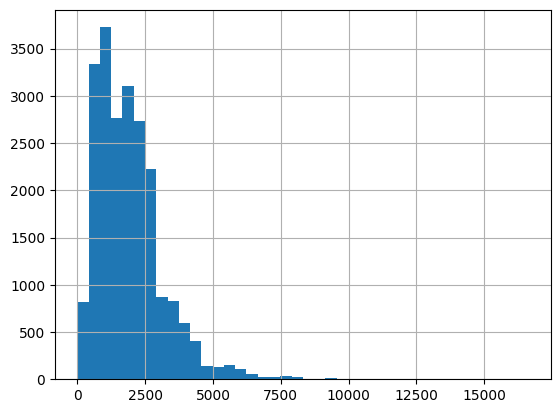

In [7]:
datos["impexac"].hist(bins=40)
plt.show()

Se aprecia que la distribución es claramente asimétrica, cola por la derecha. Podemos plantearnos una regresión de Poisson:

## Regresión de Poisson

A continuación se indican las variables explicativas tomadas para construir el modelo:

- nmiemb: número de miembros del hogar
- nmiem11: número de miembros del hogar entre 35-64 años
- nmiem13: número de miembros del hogar de 85 o más años
- numinacti: número de miembros activos en el hogar
- tiphogar1: tipo de hogar - tipo de clasificación
- situocuhog: situación del hogar respecto a la ocupación
- situacthog: situación del hogar respecto a la actividad
- numnoestu: número de no estudiantes en el hogar
- impexac: ingresos corrientes del hogar

In [8]:
# Modelo GLM - Variable respuesta sigue una distribución de Poisson - link log
formula = 'impexac ~ nmiemb + nmiem11 + nmiem13 + numinacti + numnoestu + numinacti + C(situacthog) + C(tiphogar1) + C(situocuhog)'  #C para identificar el factor
model = poisson(formula, data=datos).fit() 
model.summary()

Optimization terminated successfully.
         Current function value: 232.133445
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                impexac   No. Observations:                17771
Model:                        Poisson   Df Residuals:                    17740
Method:                           MLE   Df Model:                           30
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                  0.3732
Time:                        09:01:56   Log-Likelihood:            -4.1252e+06
converged:                       True   LL-Null:                   -6.5811e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================================================================================================================
                                                                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                       7.5648      0.003   2207.971      0.000       7.558       7.572
C(situacthog)[T.El sustentador principal o el cónyuge activo, ninguno de los otros miembros activos (si es que los hay)]        0.1696      0.002     73.739      0.000       0.165       0.174
C(situacthog)[T.El sustentador principal o el cónyuge activo, otro de los miembros también activo]                              0.0344      0.002     17.395      0.000       0.031       0.038
C(situacthog)[T.El sustentador principal y el cónyuge activos, al menos otro de los miembros también activo]                   -0.1386      0.002    -73.622      0.000      -0.142      -0.135
C(situacthog)[T.El sustentador principal y el cónyuge activos, ninguno de los otros miembros activos (si es que los hay)]       0.0661      0.002     30.695      0.000       0.062       0.070
C(situacthog)[T.Ni el sustentador principal ni su cónyuge activos, al menos otros dos miembros activos]                         0.2591      0.003    101.873      0.000       0.254       0.264
C(situacthog)[T.Ni el sustentador principal ni su cónyuge activos, otro miembro activo]                                         0.4406      0.002    190.300      0.000       0.436       0.445
C(situacthog)[T.Ningún activo en el hogar]                                                                                      0.5847      0.003    215.944      0.000       0.579       0.590
C(tiphogar1)[T.Padre o madre solo, con al menos un hijo de 16 o más años]                                                      -0.0458      0.002    -21.299      0.000      -0.050      -0.042
C(tiphogar1)[T.Pareja con al menos un hijo de 16 o más años]                                                                   -0.0291      0.001    -36.131      0.000      -0.031      -0.028
C(tiphogar1)[T.Pareja con dos hijos menores de 16 años]                                                                         0.0574      0.001     48.061      0.000       0.055       0.060
C(tiphogar1)[T.Pareja con tres o más hijos menores de 16 años]                                                                  0.1325      0.002     76.479      0.000       0.129       0.136
C(tiphogar1)[T.Pareja con un hijo menor de 16 años]                                                                            -0.0766      0.001    -66.987      0.000      -0.079      -0.074
C(tiphogar1)[T.Pareja sin hijos teniendo al menos uno de los miembros 65 años o más]                                            0.0387      0.001     30.581      0.000  

### Análisis de los residuos

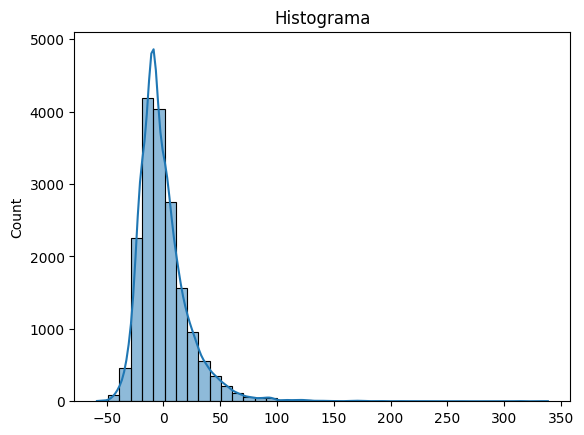

In [9]:
residuos = model.resid_pearson 
sns.histplot(residuos, bins=40, kde=True)
plt.title('Histograma')
plt.show()

Una vez graficados los residuos de Pearson se puede afirmar que siguen una distribución de Poisson.